In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(21613, 21)

In [42]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#dropping id column as we are not going to use it
df = df.drop(['id'],axis=1)

In [56]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

It is odd to find bathroom and floor in floating points but after searching it is found that there is :

*   Full Bathroom it contains four main components.
*   Half Bathroom it contains two components only.
*   Three Quarter Bathroom it has only one component missing.
*   Quarter Bathroom it has only one component.

There is also a partial floor and so on...





In [ ]:
#check if there is null values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

no null values

In [368]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [369]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

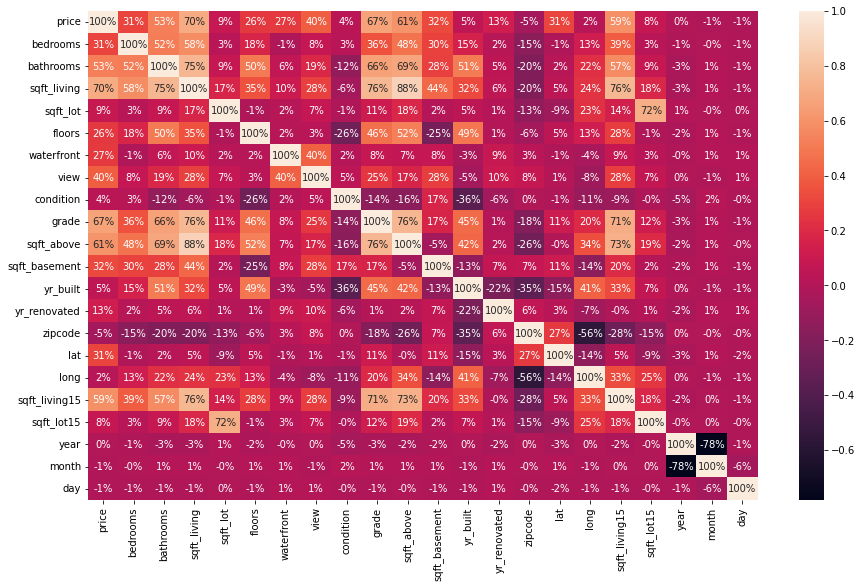

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

1-price is mostly positive correlated with all features except zipcode.

2-Top features affecting price :


*   sqft_living = sqft_above+sqft_basement
*   grade
*   bathrooms
*   sqft_living15


3-What is zip code ?

ZIP Codes are numbered with the first digit representing a certain group of U.S. states, the second and third digits together representing a region in that group (or perhaps a large city) and the fourth and fifth digits representing a group of delivery addresses within that region.

by further analysis zip code does play an important role in price prediction.


4-You can also tell that there is an inverse releation between condition and yr_bulit which does make sense .






In [5]:
#I will treat  yr_renovated as a boolean if it is renovated it's value will equal 1 otherwise value  = 0
df.loc[ df["yr_renovated"] !=0 , "yr_renovated"]=1

In [6]:
#Renaming column
df.rename(columns = {'yr_renovated':'renovated'}, inplace = True)

In [7]:
#Date plays an important role in price prediction 
#We need to write it in the right format and then split it into years , months and days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)

In [373]:
#Let's check on the updates
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [8]:
#I have created a new df to store zipcode after encoding it as it will help us in logistic regression
new_df=df

In [9]:
#Overlook
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


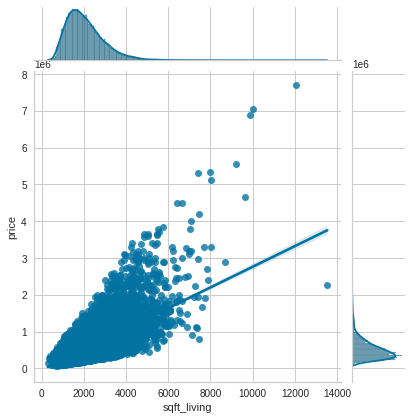

In [376]:
sns.jointplot(x='sqft_living',y='price',data=df,kind='reg')

As we can see there is a linear relaetion between sqft_living and price

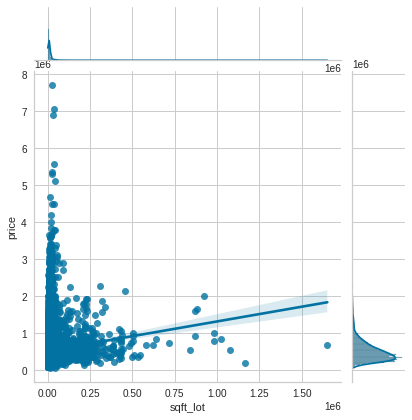

In [377]:
sns.jointplot(x='sqft_lot',y='price',data=df,kind='reg')

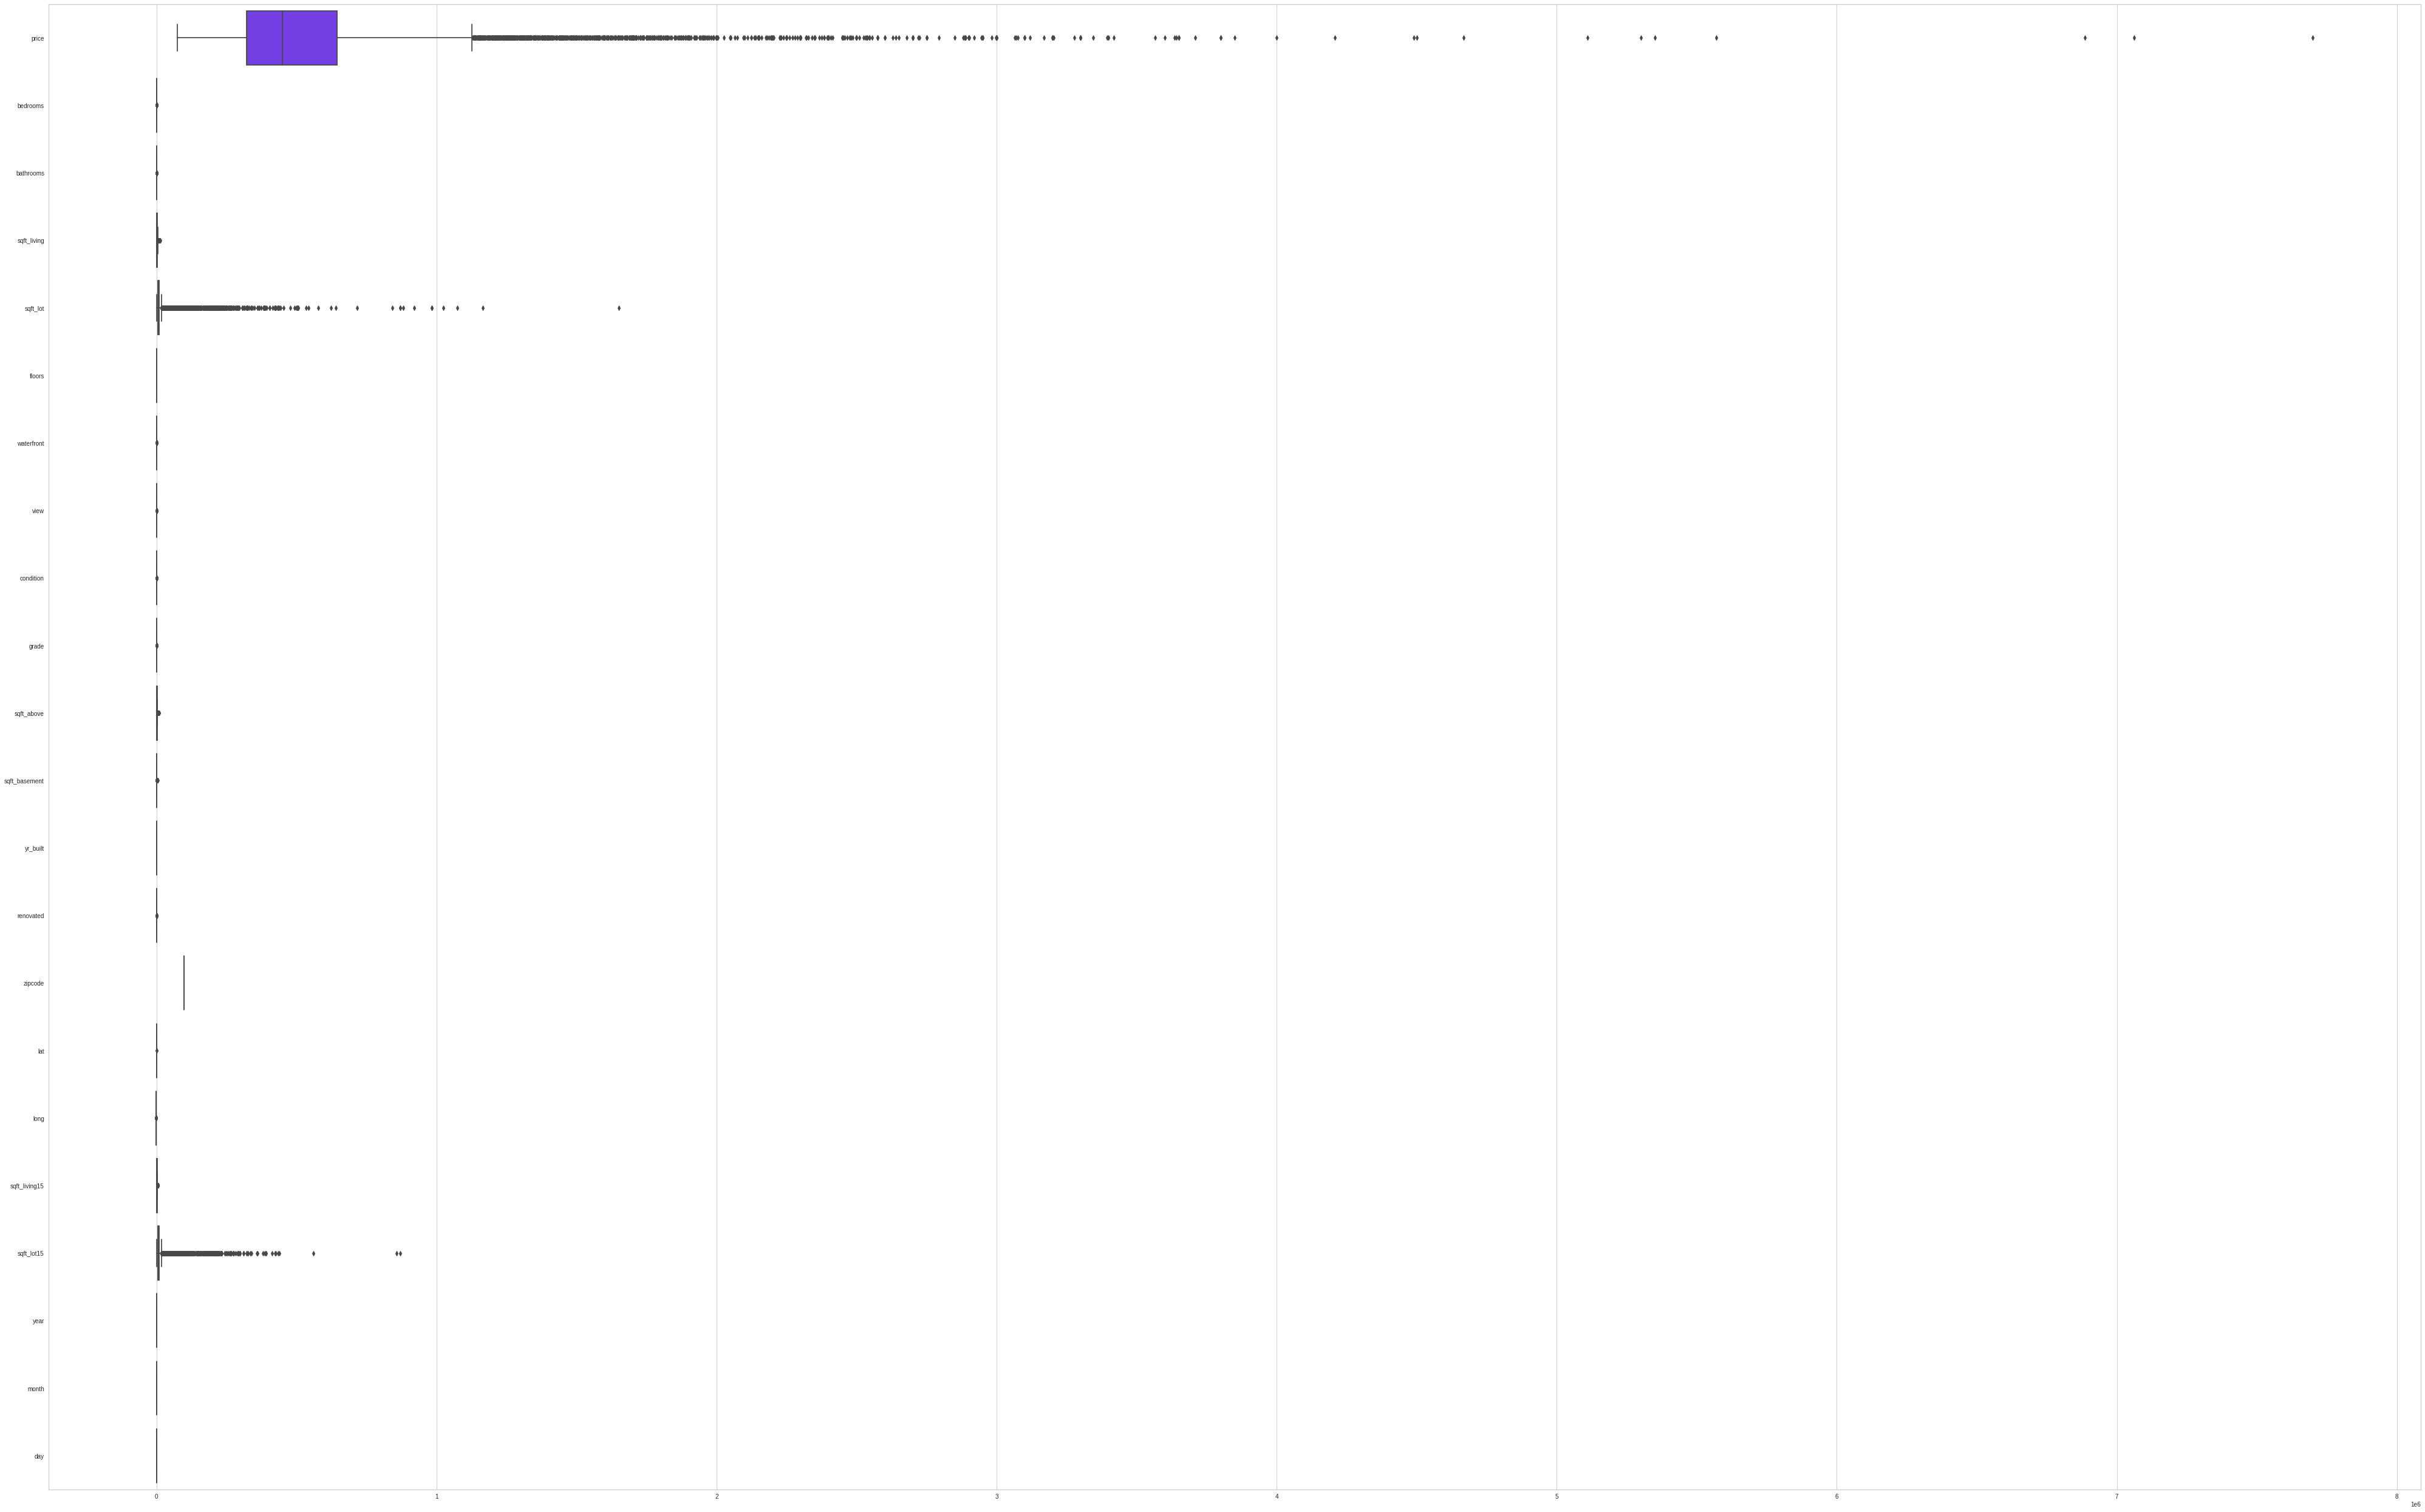

In [378]:
# Checking outliers
plt.figure(figsize= (70,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


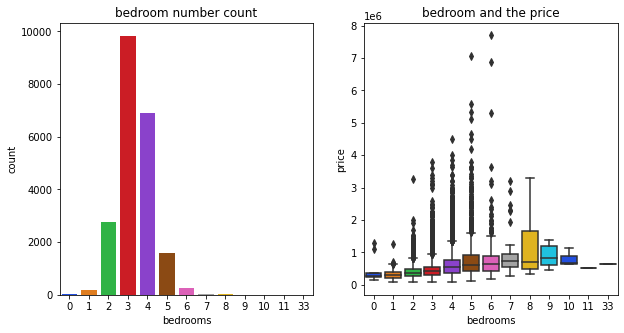

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('bedroom number count')
sns.countplot(df.bedrooms, palette=("bright"))

plt.subplot(1,2,2)
plt.title('bedroom and the price')
sns.boxplot(x=df.bedrooms, y=df.price, palette=("bright"))

plt.show()

Common number of Bedrooms is 3 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


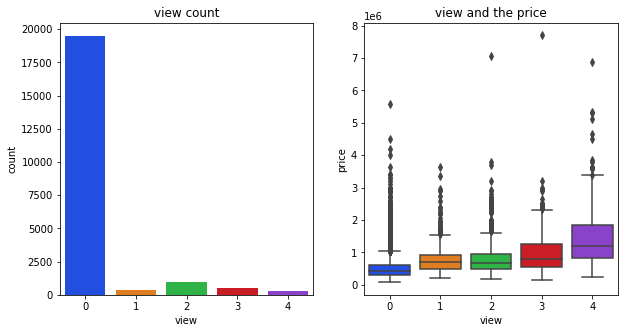

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('view count')
sns.countplot(df.view, palette=("bright"))

plt.subplot(1,2,2)
plt.title('view and the price')
sns.boxplot(x=df.view, y=df.price, palette=("bright"))

plt.show()

I have decided to drop view

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


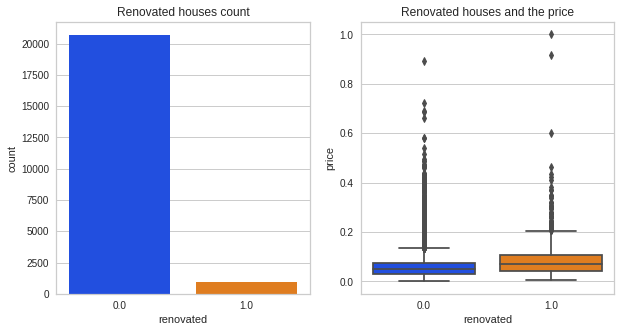

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Renovated houses count')
sns.countplot(df.renovated, palette=("bright"))

plt.subplot(1,2,2)
plt.title('Renovated houses and the price')
sns.boxplot(x=df.renovated, y=df.price, palette=("bright"))

plt.show()

Most houses are not renovated .

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


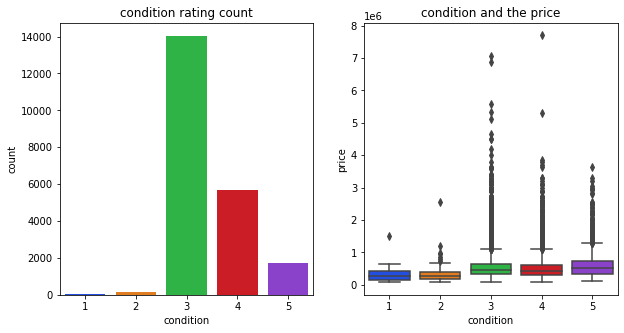

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('condition rating count')
sns.countplot(df.condition, palette=("bright"))

plt.subplot(1,2,2)
plt.title('condition and the price')
sns.boxplot(x=df.condition, y=df.price, palette=("bright"))

plt.show()

Common Condition is 3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


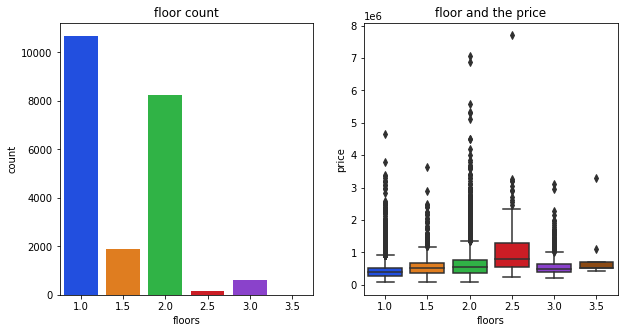

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('floor count')
sns.countplot(df.floors, palette=("bright"))

plt.subplot(1,2,2)
plt.title('floor and the price')
sns.boxplot(x=df.floors, y=df.price, palette=("bright"))

plt.show()

Common number of floors is 1 also houses with 2.5 floor has the highest price.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


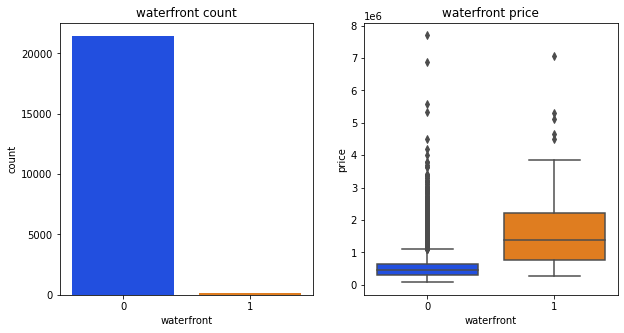

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('waterfront count')
sns.countplot(df.waterfront, palette=("bright"))

plt.subplot(1,2,2)
plt.title('waterfront price')
sns.boxplot(x=df.waterfront, y=df.price, palette=("bright"))

plt.show()

I decided to drop waterfront as most houses doesn't have waterfront view.

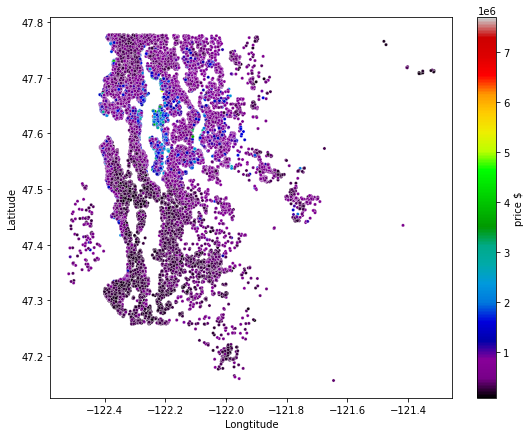

In [ ]:
#We are going to use long and lat to visualize the geographical locations of houses and it is effect on price

plt.figure(figsize=(9,7))
ax = sns.scatterplot(x=df['long'],y=df['lat'],hue=df['price'],palette='nipy_spectral',s=10,legend=None,data=df)
norm=plt.Normalize(df['price'].min(),df['price'].max())
smap=plt.cm.ScalarMappable(cmap='nipy_spectral',norm=norm)
smap.set_array([])
ax.figure.colorbar(smap,label='price $')
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.show()


We can see that houses concentrated between 47.6(lat) and -122.25(long) have highest prices.

In [10]:
#Encoding function
def dummies(x,df):
  temp = pd.get_dummies(df[x], drop_first = True)
  df = pd.concat([df, temp], axis = 1)
  df.drop([x], axis = 1, inplace = True)
  return df

In [11]:
#Encoding zipcode
new_df = dummies('zipcode',new_df)

**Feature Scaling**

In [12]:
#scaling the numeric values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['price','grade','condition','sqft_living','sqft_lot','sqft_above','yr_built','sqft_basement','lat','long','sqft_living15','sqft_lot15','renovated','yr_built','bedrooms','bathrooms','floors','view','waterfront','year','month','day']

df[num_vars] = scaler.fit_transform(df[num_vars])
new_df[num_vars] = scaler.fit_transform(new_df[num_vars])

**Split data into X and Y**

In [13]:
#As i mentioned before that sqft_living = sqft_above+sqft_basement so i will also drop sqft_above and sqft_basement
X=df.drop(['price', 'view','waterfront','sqft_above','sqft_basement'] ,axis=1)
Y=df['price']

df.drop([ 'view','waterfront','sqft_above','sqft_basement'] ,axis=1,inplace=True)
new_df.drop([ 'view','waterfront','sqft_above','sqft_basement'] ,axis=1,inplace=True)





In [13]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0.090909,0.12500,0.067170,0.003108,0.0,0.5,0.500000,0.478261,0.0,98178,0.571498,0.217608,0.161934,0.005742,0.0,0.818182,0.400000
1,0.090909,0.28125,0.172075,0.004072,0.4,0.5,0.500000,0.443478,1.0,98125,0.908959,0.166113,0.222165,0.008027,0.0,1.000000,0.266667
2,0.060606,0.12500,0.036226,0.005743,0.0,0.5,0.416667,0.286957,0.0,98028,0.936143,0.237542,0.399415,0.008513,1.0,0.090909,0.800000
3,0.121212,0.37500,0.126038,0.002714,0.0,1.0,0.500000,0.565217,0.0,98136,0.586939,0.104651,0.165376,0.004996,0.0,1.000000,0.266667
4,0.090909,0.25000,0.104906,0.004579,0.0,0.5,0.583333,0.756522,0.0,98074,0.741354,0.393688,0.241094,0.007871,1.0,0.090909,0.566667


**Linear Regression**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=16)

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.6685386859603389


**Polynomial regression**

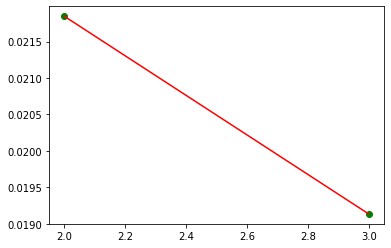

In [16]:
#Deciding degree of function
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
number_degrees = [2,3]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(X)
   poly_model.fit(poly_x_values, Y)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, Y)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(Y, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.20, random_state=11)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_predicted = poly_reg_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print(metrics.r2_score(y_predicted,y_test))
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
poly_reg_rmse

0.7784351689630504


0.020269744245472805